In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import re

1.43905751699768


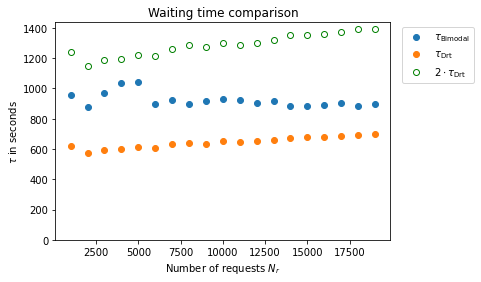

In [4]:
directory_bim = "/home/helge/Programs/matsim/matsim_results/24h_drt_1percent-bim_19102020"
directory_drt = "/home/helge/Programs/matsim/matsim_results/24h_drt_1percent-drts_19102020"

def getTimes(directory):
    reqs = []
    total_times = []
    
    for root, subdirs, files in os.walk(directory):
        for file in files:
            if file == '0.waitStats_drt.csv':
                requests = re.match(".*/(\d*)reqs/.*", root)
                file = open(os.path.join(root,file))
                for x in file:
                    total_time = re.match("Total waiting time;(\d*\.*\d*E?\d*)", x)
                    if total_time and requests.group(1) != '20000':
                        reqs.append(requests.group(1))
                        total_times.append(total_time.group(1))
                file.close()
    
    total_times = np.array([float(time) for time in total_times])
    reqs = np.array([float(request) for request in reqs])
    return reqs, total_times


requests_bim, times_bim = getTimes(directory_bim)
requests_drt, times_drt = getTimes(directory_drt)
av_times_bim = times_bim/requests_bim
av_times_drt = times_drt/requests_drt

print(np.average(av_times_bim/av_times_drt))

plt.scatter(requests_bim, av_times_bim, label=r"$\tau_{\mathrm{Bimodal}}$")
plt.scatter(requests_drt, av_times_drt, label=r"$\tau_{\mathrm{Drt}}$")
plt.scatter(requests_drt, 2*av_times_drt, label=r"$2 \cdot \tau_{\mathrm{Drt}}$", c="white", edgecolors="green")
plt.ylim(0, None)
plt.xlabel(r"Number of requests $N_r$")
plt.ylabel(r"$\tau$ in seconds")
plt.title('Waiting time comparison')
lgd = plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.savefig("WaitingTimeComp.png", bbox_extra_artists=(lgd,), bbox_inches='tight')

plt.show()